In [2]:
import pandas as pd
import json
import os
import seaborn as sns
%matplotlib inline

In [10]:
#read text
human_label_df = pd.read_csv('data/doc2dial/human_label.csv', header=None)

In [11]:
human_label_df[0]

0      no
1      no
2      no
3     yes
4      no
     ... 
95    yes
96    yes
97    yes
98     no
99     no
Name: 0, Length: 100, dtype: object

In [10]:
def example(index):
    # print(df.loc[index])
    print('Question: ')
    print(df.loc[index]['question'])
    print('True Answer:')
    print(df.loc[index]['answer'])
    print('Model Answer:')
    print(df.loc[index]['model_answer'])
    print('True Ref:')
    print(df.loc[index]['true_ref_str'])
    print('retrived_doc:')
    print(df.loc[index]['retrived_doc'])

    
def analys(df):
    answer_f1_avg = df['answer_f1'].mean()
    answer_prec = df['answer_prec'].mean()
    answer_recall = df['answer_recall'].mean()
    # autoais_retrevied = df['autoais_retrevied(model_answer)'].mean()
    autoais_retrevied = len(df[df['autoais_retrevied(model_answer)'] == '1'])/len(df)
    att_f1 = df['att_f1'].mean()
    att_prec = df['att_prec'].mean()
    att_recall = df['att_recall'].mean()
    autoais_true_answer = len(df[df['autoais_true_answer'] == '1'])/len(df)
    print(f'answer_f1_avg: {answer_f1_avg}')
    print(f'answer_prec: {answer_prec}')
    print(f'answer_recall: {answer_recall}')
    print(f'autoais_retrevied: {autoais_retrevied}')
    print(f'att_f1: {att_f1}')
    print(f'att_prec: {att_prec}')
    print(f'att_recall: {att_recall}')
    print(f'autoais_true_answer: {autoais_true_answer}')
    

# normal analysis

In [4]:
target_path = 'data/doc2dial/new_dataset'

# folders = []
for subfolder in os.listdir(target_path):
    if not os.path.isdir(os.path.join(target_path, subfolder)):
        continue
    subfolder_path = os.path.join(target_path, subfolder)

    eval_path = os.path.join(subfolder_path, 'eval.csv')
    extra_path = os.path.join(subfolder_path, 'extra_eval.csv')
    cos_sim_path = os.path.join(subfolder_path, 'cos_sim.csv')

    eval_df = pd.read_csv(eval_path)
    extra_df = pd.read_csv(extra_path)
    cos_sim_df = pd.read_csv(cos_sim_path)

    concat_df = pd.concat([eval_df, extra_df, cos_sim_df], axis=1)
    concat_df.to_csv(os.path.join(subfolder_path, 'concat.csv'))

In [2]:
test_path = 'data/doc2dial/new_dataset/DEFAULT'
eval_path = os.path.join(test_path, 'eval.csv')
extra_path = os.path.join(test_path, 'extra_eval.csv')
cos_sim_path = os.path.join(test_path, 'cos_sim.csv')

eval_df = pd.read_csv(eval_path)
extra_df = pd.read_csv(extra_path)
cos_sim_df = pd.read_csv(cos_sim_path)

print(len(eval_df), len(extra_df), len(cos_sim_df))


1000 1000 1000


# Or read concat directly from file

In [3]:
concat_df = pd.read_csv('data/doc2dial/new_dataset/DEFAULT/concat.csv')

In [46]:
concat_df['autoais_true_answer']

0                                                    yes
1                                                    yes
2                                                     no
3                                                    yes
4      The cost of the traffic points is independent ...
                             ...                        
995                           it is not possible to tell
996                           it is not possible to tell
997                                                   no
998                                                   no
999                                                   no
Name: autoais_true_answer, Length: 1000, dtype: object

In [12]:
len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])

499

In [16]:
len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'no'])

201

In [3]:
concat_df = pd.concat([eval_df, extra_df, cos_sim_df], axis=1)

In [14]:
concat_df.columns

Index(['Unnamed: 0', 'question', 'answer', 'model_answer', 'true_ref_str',
       'retrived_doc', 'answer_f1', 'answer_prec', 'answer_recall',
       'autoais_retrevied(model_answer)', 'att_f1', 'att_prec', 'att_recall',
       'autoais_true_answer', 'ref_range', 'BLEU', 'ROUGHLS', 'BLEU_ANS',
       'ROUGHLS_ANS', 'cos_sim', 'cos_sim_ans'],
      dtype='object')

In [15]:
concat_df.dtypes

Unnamed: 0                           int64
question                            object
answer                              object
model_answer                        object
true_ref_str                        object
retrived_doc                        object
answer_f1                          float64
answer_prec                        float64
answer_recall                      float64
autoais_retrevied(model_answer)     object
att_f1                             float64
att_prec                           float64
att_recall                         float64
autoais_true_answer                 object
ref_range                           object
BLEU                               float64
ROUGHLS                            float64
BLEU_ANS                           float64
ROUGHLS_ANS                        float64
cos_sim                            float64
cos_sim_ans                        float64
dtype: object

In [41]:
concat_df.loc[concat_df['cos_sim'] >= 0.8, 'cos_sim'] = 1

In [43]:
concat_df.loc[concat_df['cos_sim'] < 0.8, 'cos_sim'] = 0

In [21]:
concat_df.loc[3]

Unnamed: 0                                                                         3
question                           Ok, and can you tell me again where should I r...
answer                             Sure. Any change of address must be reported t...
model_answer                                                                     DMV
true_ref_str                       you must report a change of address to DMV wit...
retrived_doc                       By statute , you must report a change of addre...
answer_f1                                                                   0.086957
answer_prec                                                                      1.0
answer_recall                                                               0.045455
autoais_retrevied(model_answer)                                                  yes
att_f1                                                                      0.517241
att_prec                                                         

In [ ]:
# TODO BLEU/ROUGH good? or not?
# TODO GPT3.5 

In [20]:
concat_df['cos_sim'][:100]

0     0.579289
1     0.624455
2     0.624455
3     0.928467
4     0.530527
        ...   
95    0.563755
96    0.568629
97    0.647721
98    0.496772
99    0.807665
Name: cos_sim, Length: 100, dtype: float64

In [7]:
labels_df = pd.read_csv('data/doc2dial/human_label.csv')

In [10]:
labels_df

,label
0,no
1,no
2,no
3,yes
4,no
...,...
95,yes
96,yes
97,yes
98,no


In [8]:
import scipy.stats

In [13]:
correlation_coefficient, p_value = scipy.stats.pearsonr(list(labels_df['label']), list(concat_df['cos_sim'][:100]))

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

TypeError: unsupported operand type(s) for +: 'float' and 'numpy.str_'

<Axes: xlabel='label', ylabel='cos_sim'>

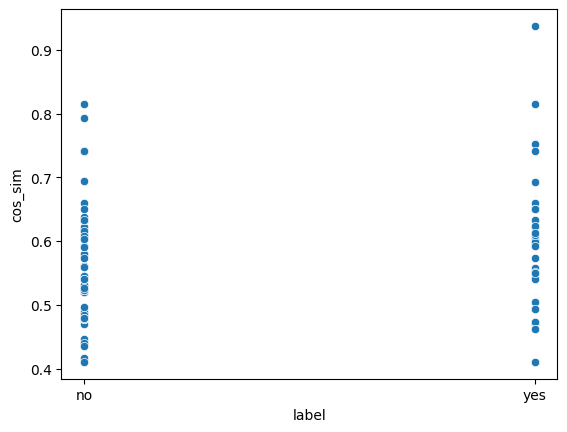

In [11]:
sns.scatterplot(x=labels_df['label'], y=concat_df['cos_sim'][:100])

In [4]:
# random sample 0 or 1 for 1000 times
import random
ls = [random.randint(0,1) for i in range(1000)]

In [23]:
att_features = ['true_ref_str', 'retrived_doc', 'att_f1', 'att_prec', 'att_recall', 'BLEU', 'ROUGHLS', 'cos_sim']
ans_features = ['answer', 'model_answer', 'answer_f1', 'answer_prec', 'answer_recall', 'BLEU_ANS',
       'ROUGHLS_ANS', 'cos_sim_ans']
others = ['question', 'ref_range', 'autoais_retrevied(model_answer)', 'autoais_true_answer']


20 20


In [34]:
len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])

459

In [4]:
len(concat_df[concat_df['autoais_true_answer'] == 'yes']) + len(concat_df[concat_df['autoais_true_answer'] == 'no'])

558

# here

In [5]:
def analys_df(concat_df):
    cos_sim_threshold = 0.75
    n = len(concat_df)
    # attribution parts
    avg_att_f1 = concat_df['att_f1'].mean()
    avg_att_prec = concat_df['att_prec'].mean()
    avg_att_recall = concat_df['att_recall'].mean()
    avg_BLEU = concat_df['BLEU'].mean()
    avg_ROUGE = concat_df['ROUGHLS'].mean()
    concat_df.loc[concat_df['cos_sim'] >= cos_sim_threshold, 'cos_sim'] = 1
    concat_df.loc[concat_df['cos_sim'] < cos_sim_threshold, 'cos_sim'] = 0
    cos_sim_num = len(concat_df[concat_df['cos_sim'] == 1])
    valid_autoais = len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes']) + len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'no'])
    auotais_yes = len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])
    auotais_no = len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'no'])

    # print(f'avg_att_prec: {avg_att_prec}, avg_att_recall: {avg_att_recall}, avg_att_f1: {avg_att_f1}')
    # print(f'avg_BLEU: {avg_BLEU}, avg_ROUGE: {avg_ROUGE}')
    # print(f'cos_sim_num: {cos_sim_num}, n: {n}, cos_sim_num/n: {cos_sim_num/n}')
    # print(f'yes: {auotais_yes}, no: {auotais_no}, valid_autoais: {valid_autoais}')
    # print(f'autoais_yes/valid_autoais: {auotais_yes/valid_autoais}, autoais_yes/n: {auotais_yes/n}')

    # print('------------------')
    avg_ans_f1 = concat_df['answer_f1'].mean()
    avg_ans_prec = concat_df['answer_prec'].mean()
    avg_ans_recall = concat_df['answer_recall'].mean()
    avg_ans_BLEU = concat_df['BLEU_ANS'].mean()
    ave_ans_ROUGE = concat_df['ROUGHLS_ANS'].mean()
    concat_df.loc[concat_df['cos_sim_ans'] >= cos_sim_threshold, 'cos_sim_ans'] = 1
    concat_df.loc[concat_df['cos_sim_ans'] < cos_sim_threshold, 'cos_sim_ans'] = 0
    cos_sim_ans_num = len(concat_df[concat_df['cos_sim_ans'] == 1])
    valid_autoais_ans = len(concat_df[concat_df['autoais_true_answer'] == 'yes']) + len(concat_df[concat_df['autoais_true_answer'] == 'no'])
    auotais_ans_yes = len(concat_df[concat_df['autoais_true_answer'] == 'yes'])
    auotais_ans_no = len(concat_df[concat_df['autoais_true_answer'] == 'no'])

    # print(f'avg_ans_prec: {avg_ans_prec}, avg_ans_recall: {avg_ans_recall}, avg_ans_f1: {avg_ans_f1}')
    # print(f'avg_ans_BLEU: {avg_ans_BLEU}, ave_ans_ROUGE: {ave_ans_ROUGE}')
    # print(f'cos_sim_ans_num: {cos_sim_ans_num}, n: {n}, cos_sim_ans_num/n: {cos_sim_ans_num/n}')
    # print(f'yes: {auotais_ans_yes}, no: {auotais_ans_no}, valid_autoais_ans: {valid_autoais_ans}')
    # print(f'autoais_ans_yes/valid_autoais_ans: {auotais_ans_yes/valid_autoais_ans}, autoais_ans_yes/n: {auotais_ans_yes/n}')



    # autoais_model_answer = len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])/n
    # autoais_answer = len(concat_df[concat_df['autoais_true_answer'] == 'yes'])/n
    # concat_df['autoais_true_answer'] = concat_df['autoais_true_answer'].replace({'yes': 1, 'no': 0, 'it is not possible to tell': -1})

    # print('autoais_model_answer: ', autoais_model_answer)
    # print('autoais_answer: ', autoais_answer)
    ls = [avg_att_prec, avg_att_recall, avg_att_f1, avg_BLEU, avg_ROUGE, cos_sim_num, auotais_yes, auotais_no, valid_autoais,
          avg_ans_prec, avg_ans_recall, avg_ans_f1, avg_ans_BLEU, ave_ans_ROUGE, cos_sim_ans_num,auotais_ans_yes, auotais_ans_no, valid_autoais_ans]
    return ls

# new method only

In [7]:
# redo for new method experiments
# 1. create new concat.csv
target_path = 'data/doc2dial/new_dataset'

# folders = []
for subfolder in os.listdir(target_path):
    if '_new' in subfolder:
        # for new method only
        subfolder_path = os.path.join(target_path, subfolder)

        print(subfolder_path)
        # eval_path = os.path.join(subfolder_path, 'eval.csv')
        # extra_path = os.path.join(subfolder_path, 'extra_eval.csv')
        # cos_sim_path = os.path.join(subfolder_path, 'cos_sim.csv')

        # eval_df = pd.read_csv(eval_path)
        # extra_df = pd.read_csv(extra_path)
        # cos_sim_df = pd.read_csv(cos_sim_path)

        # concat_df = pd.concat([eval_df, extra_df, cos_sim_df], axis=1)
        # concat_df.to_csv(os.path.join(subfolder_path, 'concat.csv'))

data/doc2dial/new_dataset/doc2dial_1000_top1_new
data/doc2dial/new_dataset/doc2dial_500_top1_new
data/doc2dial/new_dataset/doc2dial_250_top1_new


In [ ]:
# analys new methods


In [14]:
analys_df(concat_df)

[0.2260629408018919,
 0.4726534693889257,
 0.23699311750130653,
 0.022283237816085683,
 0.006535238436753232,
 106,
 459,
 168,
 627,
 0.31328327421318963,
 0.11323856509448196,
 0.1334359314314095,
 0.21872720633131243,
 0.04090916372918998,
 28,
 378,
 180,
 558]

In [8]:
target_path = 'data/doc2dial/new_dataset'
result_df = pd.DataFrame(columns=['Experiments', 'avg_att_prec', 'avg_att_recall', 'avg_att_f1', 
                                      'avg_BLEU', 'avg_ROUGE', 
                                      'cos_sim_num', 'auotais_yes', 'auotais_no', 'valid_autoais',
                                      'avg_ans_prec', 'avg_ans_recall', 'avg_ans_f1', 
                                      'avg_ans_BLEU', 'ave_ans_ROUGE', 
                                      'cos_sim_ans_num','auotais_ans_yes', 'auotais_ans_no', 'valid_autoais_ans'])

for subfolder in os.listdir(target_path):

    if not os.path.isdir(os.path.join(target_path, subfolder)):
        continue

    if subfolder == 'DEFAULT':
        name = '500_top1'
    else:
        name = subfolder

    subfolder_path = os.path.join(target_path, subfolder)
    file_name = 'concat.csv'
    file_path = os.path.join(subfolder_path, file_name)

    if not os.path.exists(file_path):
        print('not exist: ', file_path)
    else:
        print('read: ', file_path)
        concat_df = pd.read_csv(file_path)
        ls = analys_df(concat_df)
        result_df.loc[len(result_df)] = [name] + ls 

result_df.to_csv('temp_new.csv', index=False)

read:  data/doc2dial/new_dataset/DEFAULT/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_250_top5/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_500_top5/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_1000_top1_new/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_250_top1/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_1000_top1/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_500_top1_new/concat.csv
read:  data/doc2dial/new_dataset/doc2dial_250_top1_new/concat.csv


In [19]:
result_df

,Experiments,avg_att_prec,avg_att_recall,avg_att_f1,avg_BLEU,avg_ROUGE,cos_sim_num,auotais_yes,auotais_no,valid_autoais,avg_ans_prec,avg_ans_recall,avg_ans_f1,avg_ans_BLEU,ave_ans_ROUGE,cos_sim_ans_num,auotais_ans_yes,auotais_ans_no,valid_autoais_ans
0,doc2dial_250_top1_new,0.281097,0.339823,0.250622,0.032763,0.009315,140,499,201,700,0.302083,0.091849,0.118345,0.220112,0.043247,34,398,234,632


In [5]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
name = 'name'
[name] + l 

['name', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
concat_df.iloc[4]['autoais_true_answer']

'The cost of the traffic points is independent of the DRA, so you get a separate charge based on the total points you accumulate.'

In [16]:
sns.heatmap(concat_df[num_cols].corr(), annot=True, linewidths=.5, fmt= '.2f')

NameError: name 'num_cols' is not defined

In [ ]:
sns.heatmap(concat_df['cos_sim'], annot=True, linewidths=.5, fmt= '.2f')

In [29]:
read = pd.read_csv('data/doc2dial/new_dataset/doc2dial_500_top5/doc2dial_500_top5_ModelAnswer.csv')

In [31]:
read.loc[4]

question        Can you tell me more about Traffic points and ...
answer          Traffic points is the system used by DMV to tr...
model_answer    DMV maintains a point system to track dangerou...
ref             [{'sp_id': '41', 'label': 'solution'}, {'sp_id...
retrived_doc    4. Understanding how Much Traffic Points Cost\...
doc_id               Top 5 DMV Mistakes and How to Avoid Them#3_0
dial_id                          9f44c1539efe6f7e79b02eb1b413aa43
Name: 4, dtype: object

In [42]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import nltk
import re
import os
import pandas as pd

In [38]:
def extract_one_sentence(chunk, answer, method='BLEU'):
    if re.match(r'\d. ', chunk) is not None:
        # if chunk start with like '1. ', remove it
        chunk = chunk[3:]

    sentences = nltk.sent_tokenize(chunk)
    best_sentence = '' 
    best_score = 0

    ref_tokens = nltk.word_tokenize(answer)
    
    if method == 'BLEU':
        if len(sentences) == 1:
            return sentences[0]
        
        chencherry = SmoothingFunction()
        for sentence in sentences:
            if re.match(r'\d\.', sentence) is not None:
                continue

            sentence_tokens = nltk.word_tokenize(sentence)
            score = sentence_bleu([ref_tokens], sentence_tokens, smoothing_function=chencherry.method2)
            
            if score > best_score:
                best_score = score
                best_sentence = sentence

    return best_sentence

In [154]:
s = extract_one_sentence(read.loc[1]['retrived_doc'], read.loc[1]['model_answer'])
print(s)

In [148]:
s

''

In [36]:
print(read.loc[4]['retrived_doc'])

4. Understanding how Much Traffic Points Cost
DMV maintains a point system to track dangerous drivers. Often , motorists convicted of a traffic ticket feel they have resolved all their motoring issues with the local court, but later learn that the Driver Responsibility Assessment DRA is a separate DMV charge based on the total points they accumulate. The $300 DRA fee can be paid in $100 annual installments over three years. Motorists who fail to maintain an updated address with DMV may resolve their tickets with the court, but never
receive their DRA assessment because we do not have their new address on record. Failure to pay the DRA will result in a suspended license. Learn more about About the NYS Driver Point System [4] and how to Pay Driver Responsibility Assessment [5 ]
a lost title, paying a DRA or scheduling a road test. Our award - winning website is recognized as one of the best in the nation. It has all the answers you need to efficiently perform any DMV transaction. Conside

# Extract attribution

In [63]:
target_path = 'data/doc2dial/new_dataset'

for subfolder in os.listdir(target_path):

    result_df = pd.DataFrame(columns=['question', 'answer', 'model_answer', 'retrived_doc', 'ref', 'attribution', 'doc_id'])

    if not os.path.isdir(os.path.join(target_path, subfolder)):
        continue

    if subfolder == 'DEFAULT':
        name = '500_top1'
    else:
        name = subfolder

    subfolder_path = os.path.join(target_path, subfolder)
    ourpur_path = os.path.join(subfolder_path, 'attribution_.csv')
    ############################
    if 'new' in subfolder:
        file_name = subfolder + '_xModelAnswer.csv' 
    else:
        file_name = subfolder + '_ModelAnswer.csv' 

    file_path = os.path.join(subfolder_path, file_name)
    ################################

    if not os.path.exists(file_path):
        file_path = '/'.join(file_path.split('/')[:-1]) + '/checkpoint.csv'
        if not os.path.exists(file_path):
            raise Exception('File not found: {}'.format(file_path))
            
    if os.path.exists(file_path):
        print('target file: ', file_path)
        # print('Processing: {}'.format(ourpur_path))
        df = pd.read_csv(file_path)
        for index, row in df.iterrows():
            chunk = row['retrived_doc']
            model_answer = row['model_answer'] if not pd.isna(row['model_answer']) else ''
            attr = extract_one_sentence(chunk, model_answer)

            result_df.loc[len(result_df)] = [row['question'], 
                                            row['answer'], 
                                            row['model_answer'], 
                                            row['retrived_doc'],
                                            row['ref'],
                                            attr,
                                            row['doc_id']]
    result_df.to_csv(ourpur_path, index=False)

target file:  data/doc2dial/new_dataset/DEFAULT/DEFAULT_ModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_250_top5/doc2dial_250_top5_ModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_500_top5/doc2dial_500_top5_ModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_1000_top1_new/checkpoint.csv
target file:  data/doc2dial/new_dataset/doc2dial_250_top1/doc2dial_250_top1_ModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_1000_top1/doc2dial_1000_top1_ModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_500_top1_new/doc2dial_500_top1_new_xModelAnswer.csv
target file:  data/doc2dial/new_dataset/doc2dial_250_top1_new/doc2dial_250_top1_new_xModelAnswer.csv


In [5]:
d = pd.read_csv('data/doc2dial/new_dataset/doc2dial_1000_top1_new/attribution_.csv')
d

NameError: name 'pd' is not defined

In [55]:
import re

In [123]:
re.match(r'^\d+\. ', 'customers 3. visiting a DMV office do ') !=  None

False

In [113]:
def starts_with_digit_and_period(sentence):
    pattern = r'^\d+\. '  # Regular expression pattern for \d. 
    return re.match(pattern, sentence) is not None

# Test sentences
sentences = ["1. This is a valid sentence.",
             "2. Another valid sentence.",
             "A regular 3. sentence without a digit."]

for sentence in sentences:
    if starts_with_digit_and_period(sentence):
        print(f"'{sentence}' starts with a digit and a period.")
    else:
        print(f"'{sentence}' does not start with a digit and a period.")

'1. This is a valid sentence.' starts with a digit and a period.
'2. Another valid sentence.' starts with a digit and a period.
'A regular 3. sentence without a digit.' does not start with a digit and a period.


In [47]:
df = pd.read_csv('data/doc2dial/new_dataset/doc2dial_1000_top1_new/attribution.csv')

In [48]:
df

,question,answer,model_answer,attribution
0,"Hello, I forgot o update my address, can you h...","hi, you have to report any change of address t...","Yes, I will.","Also , turning in your plates is important to ..."
1,Can I do my DMV transactions online?,"Yes, you can sign up for MyDMV for all the onl...",No,NaN
2,"Thanks, and in case I forget to bring all of t...",This happens often with our customers so that'...,Don't visit a DMV office at all,"Better yet , don t visit a DMV office at all, ..."
3,"Ok, and can you tell me again where should I r...",Sure. Any change of address must be reported t...,DMV,Many DMV customers make easily avoidable mista...
4,Can you tell me more about Traffic points and ...,Traffic points is the system used by DMV to tr...,DMV maintains a point system to track dangerou...,"Often , motorists convicted of a traffic ticke..."
...,...,...,...,...
507,I need more info on self-certification,Do you need to self-certify?,I need to know how to get my CDL back to a CDL.,"If your CDL was downgraded because of your "" n..."
508,No,Do you want to know the self-certification dri...,"I am not a ""private"" company that provides sch...","I work for a ""private"" company that provides s..."
509,No,Do you want to know what happens if your drivi...,"I am not a ""private"" company that provides sch...","I work for a ""private"" company that provides s..."
510,Yes,If your driving type changes you must go into ...,Yes,"Yes , you are eligible for Excepted Intrastate..."


In [29]:
print(df.loc[0]['retrived_doc'])

Many DMV customers make easily avoidable mistakes that cause them significant problems, including encounters with law enforcement and impounded vehicles. Because we see customers make these mistakes over and over again , we are issuing this list of the top five DMV mistakes and how to avoid them.
1. Forgetting to Update Address 
By statute , you must report a change of address to DMV within ten days of moving. That is the case for the address associated with your license, as well as all the addresses associated with each registered vehicle, which may differ. It is not sufficient to only: write your new address on the back of your old license; tell the United States Postal Service; or inform the police officer writing you a ticket. If you fail to keep your address current , you will miss a suspension order and may be charged with operating an unregistered vehicle and/or aggravated unlicensed operation, both misdemeanors. This really happens , but the good news is this is a problem that 

In [44]:
for sentence in nltk.sent_tokenize(df.loc[0]['retrived_doc']):

    if re.match(r'\d\.', sentence) is not None:
        continue

    print(sentence)
    print('*****')

Many DMV customers make easily avoidable mistakes that cause them significant problems, including encounters with law enforcement and impounded vehicles.
*****
Because we see customers make these mistakes over and over again , we are issuing this list of the top five DMV mistakes and how to avoid them.
*****
Forgetting to Update Address 
By statute , you must report a change of address to DMV within ten days of moving.
*****
That is the case for the address associated with your license, as well as all the addresses associated with each registered vehicle, which may differ.
*****
It is not sufficient to only: write your new address on the back of your old license; tell the United States Postal Service; or inform the police officer writing you a ticket.
*****
If you fail to keep your address current , you will miss a suspension order and may be charged with operating an unregistered vehicle and/or aggravated unlicensed operation, both misdemeanors.
*****
This really happens , but the goo

In [1]:
from dataloader import attDataset
from torch.utils.data import DataLoader

path = 'data/doc2dial/new_dataset/DEFAULT/attribution_.csv'

dataset = attDataset(path)

/home/ygong/miniconda3/envs/cloned/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [7]:
len(dataloader)

32

In [3]:
for batch in dataloader:
    continue    
    # questions = batch['question']
    # print(questions)
        # answers = batch['answer']
        # # could be nan
        # model_answer = [temp if isinstance(temp, str) else '' for temp in batch['model_answer']]
        # # could be nan
        # attribution_ls = [temp if isinstance(temp, str) else '' for temp in batch['attribution']]
        # true_refs = [temp if isinstance(temp, str) else '' for temp in batch['ref_string'] ]


In [22]:
import pandas as pd
df = pd.read_csv('data/doc2dial/new_dataset/doc2dial_250_top1_new/eval_one_att.csv')

In [28]:
df.head(5)

,question,answer,model_answer,true_ref_str,attribution,answer_f1,answer_prec,answer_recall,autoais_retrevied(model_answer),att_f1,att_prec,att_recall,autoais_true_answer
0,"Hello, I forgot o update my address, can you h...","hi, you have to report any change of address t...",I'd like to know what the top five DMV mistake...,you must report a change of address to DMV wit...,the top five DMV mistakes and how to avoid them.,0.088889,0.200000,0.057143,yes,0.090909,0.222222,0.057143,no
1,Can I do my DMV transactions online?,"Yes, you can sign up for MyDMV for all the onl...",Yes,Sign up or log into MyDMV [6 ],NaN,0.153846,1.000000,0.083333,no,0.000000,0.000000,0.000000,yes
2,"Thanks, and in case I forget to bring all of t...",This happens often with our customers so that'...,a suspended license,About ten percent of customers visiting a DMV ...,Failure to pay the DRA will result in a suspen...,0.000000,0.000000,0.000000,no,0.083333,0.444444,0.045977,no
3,"Ok, and can you tell me again where should I r...",Sure. Any change of address must be reported t...,DMV,you must report a change of address to DMV wit...,"By statute , you must report a change of addre...",0.086957,1.000000,0.045455,yes,0.480000,0.800000,0.342857,yes
4,Can you tell me more about Traffic points and ...,Traffic points is the system used by DMV to tr...,DMV maintains a point system to track dangerou...,DMV maintains a point system to track dangerou...,"Often , motorists convicted of a traffic ticke...",0.312500,0.294118,0.333333,yes,0.735294,0.961538,0.595238,The cost of the traffic points is independent ...


In [26]:
print(df.loc[2]['attribution'])

Failure to pay the DRA will result in a suspended license.


In [44]:
df1 = pd.read_csv('data/doc2dial/new_dataset/doc2dial_1000_top1_new/attribution_.csv')

In [47]:
df1

,question,answer,model_answer,retrived_doc,ref,attribution,doc_id
0,"Hello, I forgot o update my address, can you h...","hi, you have to report any change of address t...","Yes, I will.",Many DMV customers make easily avoidable mista...,"[{'sp_id': '6', 'label': 'solution'}, {'sp_id'...","Also , turning in your plates is important to ...",Top 5 DMV Mistakes and How to Avoid Them#3_0
1,Can I do my DMV transactions online?,"Yes, you can sign up for MyDMV for all the onl...",No,4. Understanding how Much Traffic Points Cost ...,"[{'sp_id': '56', 'label': 'solution'}]",NaN,Top 5 DMV Mistakes and How to Avoid Them#3_0
2,"Thanks, and in case I forget to bring all of t...",This happens often with our customers so that'...,Don't visit a DMV office at all,4. Understanding how Much Traffic Points Cost ...,"[{'sp_id': '49', 'label': 'solution'}, {'sp_id...","Better yet , don t visit a DMV office at all, ...",Top 5 DMV Mistakes and How to Avoid Them#3_0
3,"Ok, and can you tell me again where should I r...",Sure. Any change of address must be reported t...,DMV,Many DMV customers make easily avoidable mista...,"[{'sp_id': '6', 'label': 'solution'}, {'sp_id'...",Many DMV customers make easily avoidable mista...,Top 5 DMV Mistakes and How to Avoid Them#3_0
4,Can you tell me more about Traffic points and ...,Traffic points is the system used by DMV to tr...,DMV maintains a point system to track dangerou...,Learn more about Insurances Lapes [2] and How ...,"[{'sp_id': '41', 'label': 'solution'}, {'sp_id...","Often , motorists convicted of a traffic ticke...",Top 5 DMV Mistakes and How to Avoid Them#3_0
...,...,...,...,...,...,...,...
507,I need more info on self-certification,Do you need to self-certify?,I need to know how to get my CDL back to a CDL.,12. The Medical Examiner s Certificate I previ...,"[{'sp_id': '2', 'label': 'precondition'}]","If your CDL was downgraded because of your "" n...",Medical Certification FAQ's#3_0
508,No,Do you want to know the self-certification dri...,"I am not a ""private"" company that provides sch...","5. I am eligible for an excepted operation, bu...","[{'sp_id': '6', 'label': 'precondition'}]","I work for a ""private"" company that provides s...",Medical Certification FAQ's#3_0
509,No,Do you want to know what happens if your drivi...,"I am not a ""private"" company that provides sch...","5. I am eligible for an excepted operation, bu...","[{'sp_id': '17', 'label': 'precondition'}]","I work for a ""private"" company that provides s...",Medical Certification FAQ's#3_0
510,Yes,If your driving type changes you must go into ...,Yes,"5. I am eligible for an excepted operation, bu...","[{'sp_id': '18', 'label': 'precondition'}]","Yes , you are eligible for Excepted Intrastate...",Medical Certification FAQ's#3_0


In [48]:
extract_one_sentence(df1.loc[1]['retrived_doc'], df1.loc[1]['model_answer'], method='BLEU')

''